### Decision Tree Regression implementation of household electricity consumption dataset

#### Activities
- Data cleaning
- EDA and FE
- Model Building
- Accuracy check

#### Dataset: https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption

In [44]:
import pandas as pd
import numpy as np
### Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
### For Q-Q Plot
import scipy.stats as stats
### To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [18]:
df=pd.read_csv('household_power_consumption.txt',sep=';')
df.head()

C:\Users\subho\AppData\Local\Temp\ipykernel_8260\4214271158.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('household_power_consumption.txt',sep=';')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


#### Basic Analysis

In [19]:
df.shape

(2075259, 9)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [21]:
#### Taking 50000 samples from this huge dataset
data=df.sample(n=50000,replace=False)
data.reset_index(inplace=True)
data.head()

,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1565696,8/12/2009,00:20:00,0.272,0.000,244.340,1.200,0.000,0.000,1.0
1,1941687,26/8/2010,02:51:00,0.342,0.208,239.760,1.600,0.000,1.000,1.0
2,1579267,17/12/2009,10:31:00,1.440,0.106,243.860,5.800,0.000,0.000,19.0
3,1652380,6/2/2010,05:04:00,0.250,0.000,244.300,1.000,0.000,0.000,1.0
4,38696,12/1/2007,14:20:00,0.288,0.156,243.650,1.400,0.000,2.000,0.0


In [23]:
data.drop('index',axis=1,inplace=True)
data.shape

(50000, 9)

In [24]:
#### All the features are of object type except 'Sub_metering_3'. Need to convert all of them to float for our ML model.
data['Date']=pd.to_datetime(data['Date'], format="%d/%m/%Y")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   50000 non-null  datetime64[ns]
 1   Time                   50000 non-null  object        
 2   Global_active_power    50000 non-null  object        
 3   Global_reactive_power  50000 non-null  object        
 4   Voltage                50000 non-null  object        
 5   Global_intensity       50000 non-null  object        
 6   Sub_metering_1         50000 non-null  object        
 7   Sub_metering_2         50000 non-null  object        
 8   Sub_metering_3         49362 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 3.4+ MB


In [25]:
#### Creating day, month column to reduce dependancy on the 'Date' column
data['day']=data['Date'].dt.day
data['month']=data['Date'].dt.month
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,month
0,2009-12-08,00:20:00,0.272,0.000,244.340,1.200,0.000,0.000,1.0,8,12
1,2010-08-26,02:51:00,0.342,0.208,239.760,1.600,0.000,1.000,1.0,26,8
2,2009-12-17,10:31:00,1.440,0.106,243.860,5.800,0.000,0.000,19.0,17,12
3,2010-02-06,05:04:00,0.250,0.000,244.300,1.000,0.000,0.000,1.0,6,2
4,2007-01-12,14:20:00,0.288,0.156,243.650,1.400,0.000,2.000,0.0,12,1


In [26]:
data['year']=data['Date'].dt.year
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,month,year
0,2009-12-08,00:20:00,0.272,0.000,244.340,1.200,0.000,0.000,1.0,8,12,2009
1,2010-08-26,02:51:00,0.342,0.208,239.760,1.600,0.000,1.000,1.0,26,8,2010
2,2009-12-17,10:31:00,1.440,0.106,243.860,5.800,0.000,0.000,19.0,17,12,2009
3,2010-02-06,05:04:00,0.250,0.000,244.300,1.000,0.000,0.000,1.0,6,2,2010
4,2007-01-12,14:20:00,0.288,0.156,243.650,1.400,0.000,2.000,0.0,12,1,2007


In [27]:
#### dropping the date and time column
data.drop(['Date','Time'],axis=1,inplace=True)
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,month,year
0,0.272,0.000,244.340,1.200,0.000,0.000,1.0,8,12,2009
1,0.342,0.208,239.760,1.600,0.000,1.000,1.0,26,8,2010
2,1.440,0.106,243.860,5.800,0.000,0.000,19.0,17,12,2009
3,0.250,0.000,244.300,1.000,0.000,0.000,1.0,6,2,2010
4,0.288,0.156,243.650,1.400,0.000,2.000,0.0,12,1,2007


In [31]:
#### Checking null values in terms of '?'
for features in data.columns:
    c=0
    for values in data[features]:
        if values=='?':
            c+=1
    print(f'{features} has {c} null values')

Global_active_power has 638 null values
Global_reactive_power has 638 null values
Voltage has 638 null values
Global_intensity has 638 null values
Sub_metering_1 has 638 null values
Sub_metering_2 has 638 null values
Sub_metering_3 has 0 null values
day has 0 null values
month has 0 null values
year has 0 null values


In [37]:
#### handling null values
data.replace('?',np.nan,inplace=True)
data.isnull().sum()

Global_active_power      638
Global_reactive_power    638
Voltage                  638
Global_intensity         638
Sub_metering_1           638
Sub_metering_2           638
Sub_metering_3           638
day                        0
month                      0
year                       0
dtype: int64

In [38]:
data.dropna(inplace=True)
data.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
day                      0
month                    0
year                     0
dtype: int64

In [39]:
data.shape

(49362, 10)

In [40]:
data.reset_index(inplace=True)
data.head()

,index,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,month,year
0,0,0.272,0.000,244.340,1.200,0.000,0.000,1.0,8,12,2009
1,1,0.342,0.208,239.760,1.600,0.000,1.000,1.0,26,8,2010
2,2,1.440,0.106,243.860,5.800,0.000,0.000,19.0,17,12,2009
3,3,0.250,0.000,244.300,1.000,0.000,0.000,1.0,6,2,2010
4,4,0.288,0.156,243.650,1.400,0.000,2.000,0.0,12,1,2007


In [41]:
data.drop('index',axis=1,inplace=True)
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,month,year
0,0.272,0.000,244.340,1.200,0.000,0.000,1.0,8,12,2009
1,0.342,0.208,239.760,1.600,0.000,1.000,1.0,26,8,2010
2,1.440,0.106,243.860,5.800,0.000,0.000,19.0,17,12,2009
3,0.250,0.000,244.300,1.000,0.000,0.000,1.0,6,2,2010
4,0.288,0.156,243.650,1.400,0.000,2.000,0.0,12,1,2007


In [42]:
#### we can now safely convert the features into numerical
for features in data.columns:
    data[features]=data[features].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49362 entries, 0 to 49361
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    49362 non-null  float64
 1   Global_reactive_power  49362 non-null  float64
 2   Voltage                49362 non-null  float64
 3   Global_intensity       49362 non-null  float64
 4   Sub_metering_1         49362 non-null  float64
 5   Sub_metering_2         49362 non-null  float64
 6   Sub_metering_3         49362 non-null  float64
 7   day                    49362 non-null  float64
 8   month                  49362 non-null  float64
 9   year                   49362 non-null  float64
dtypes: float64(10)
memory usage: 3.8 MB


In [43]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Global_active_power,49362.0,1.090352,1.062314,0.078,0.308,0.594,1.526,8.892
Global_reactive_power,49362.0,0.123314,0.112505,0.000,0.048,0.100,0.192,1.148
Voltage,49362.0,240.817051,3.268253,225.110,238.950,240.990,242.900,253.090
Global_intensity,49362.0,4.624898,4.468123,0.200,1.400,2.600,6.400,38.800
Sub_metering_1,49362.0,1.131255,6.179609,0.000,0.000,0.000,0.000,77.000
Sub_metering_2,49362.0,1.300089,5.813686,0.000,0.000,0.000,1.000,75.000
Sub_metering_3,49362.0,6.403245,8.419046,0.000,0.000,1.000,17.000,31.000
day,49362.0,15.711357,8.829163,1.000,8.000,16.000,23.000,31.000
month,49362.0,6.458024,3.423900,1.000,3.000,6.000,9.000,12.000
year,49362.0,2008.418318,1.123438,2006.000,2007.000,2008.000,2009.000,2010.000


#### Basic Graphical analysis

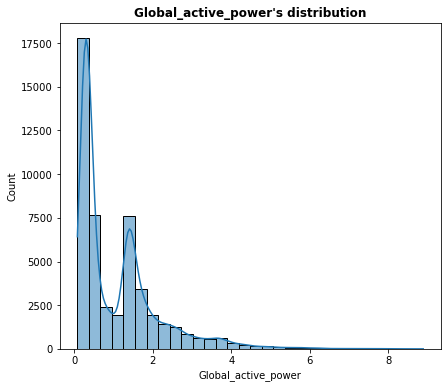

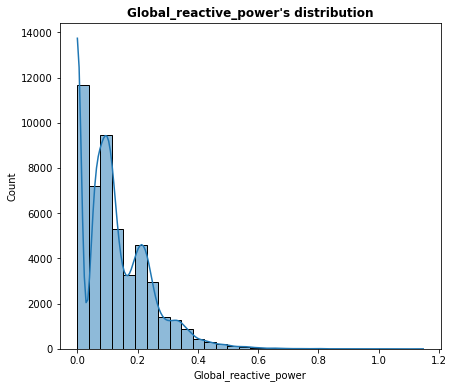

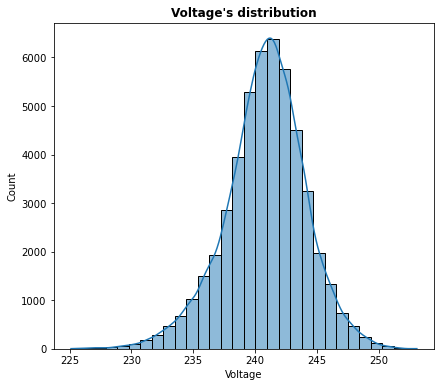

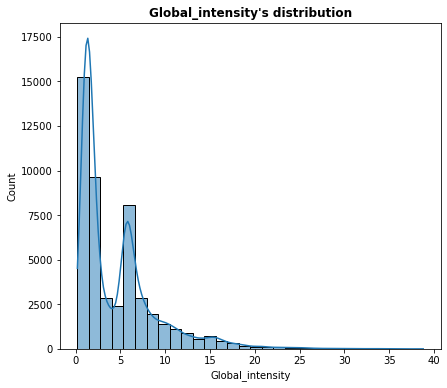

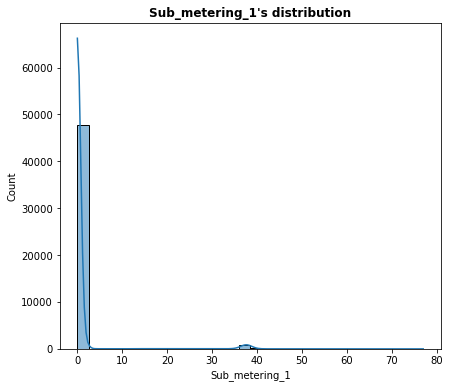

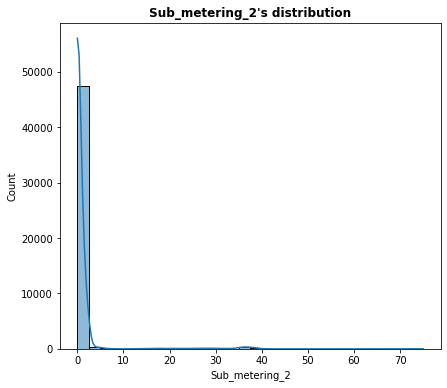

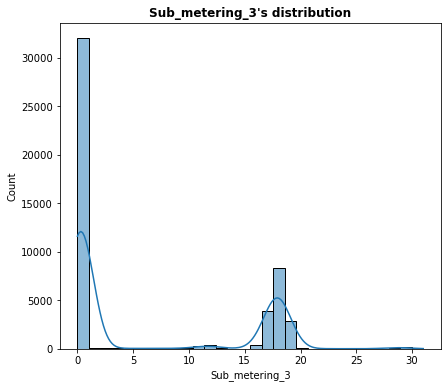

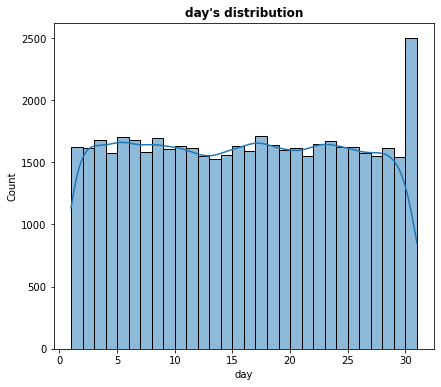

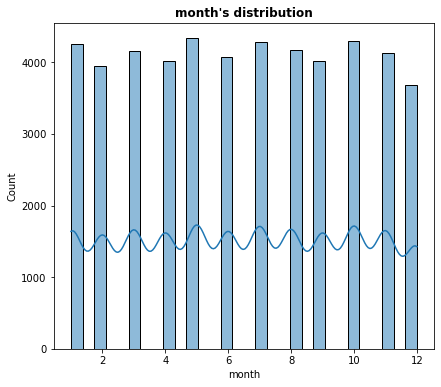

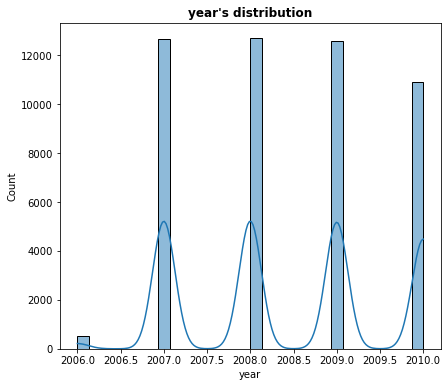

In [51]:
#### Checking the distribution of the dataset
for i in data:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,2)
    sns.histplot(data=data, x=i, kde=True, bins=30)
    plt.title("{}'s distribution".format(i),fontweight="bold")

In [52]:
#### Crating a dependant feature 'Total_Power_Usage'
data['Total_Power_Usage']=data['Sub_metering_1']+data['Sub_metering_2']+data['Sub_metering_3']
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,month,year,Total_Power_Usage
0,0.272,0.000,244.34,1.2,0.0,0.0,1.0,8.0,12.0,2009.0,1.0
1,0.342,0.208,239.76,1.6,0.0,1.0,1.0,26.0,8.0,2010.0,2.0
2,1.440,0.106,243.86,5.8,0.0,0.0,19.0,17.0,12.0,2009.0,19.0
3,0.250,0.000,244.30,1.0,0.0,0.0,1.0,6.0,2.0,2010.0,1.0
4,0.288,0.156,243.65,1.4,0.0,2.0,0.0,12.0,1.0,2007.0,2.0


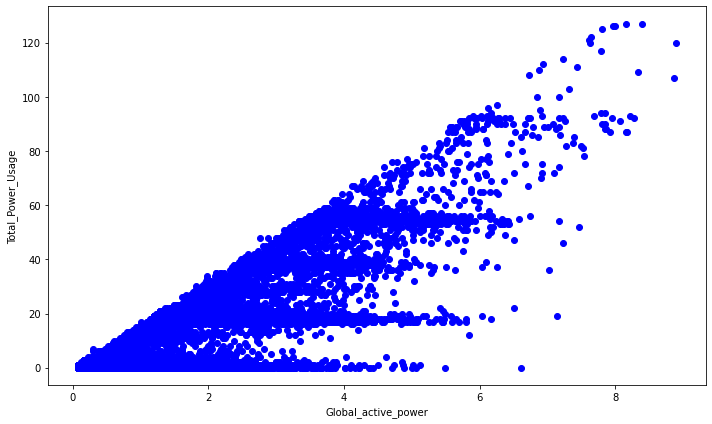

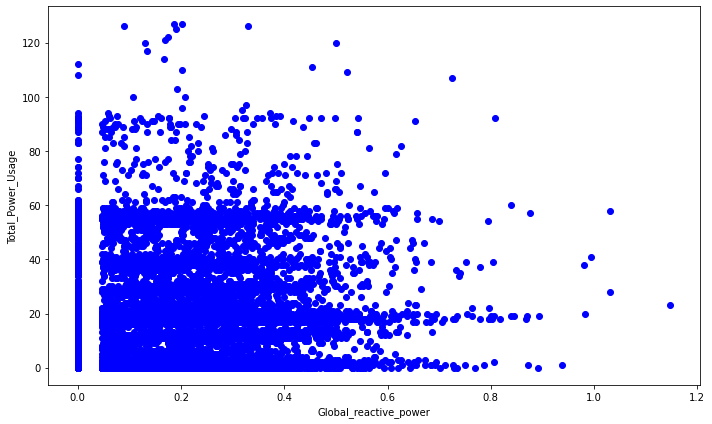

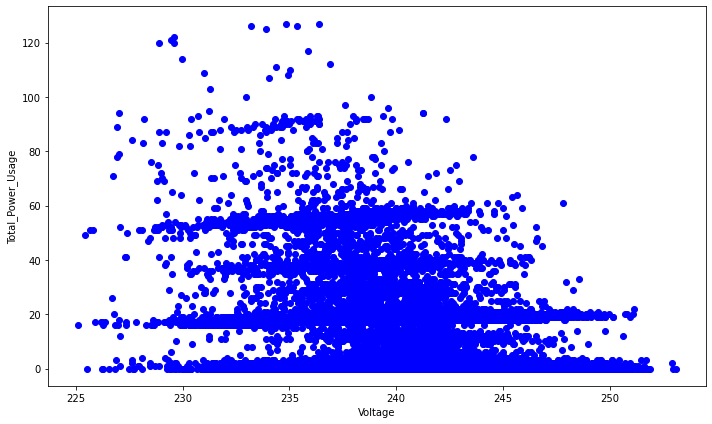

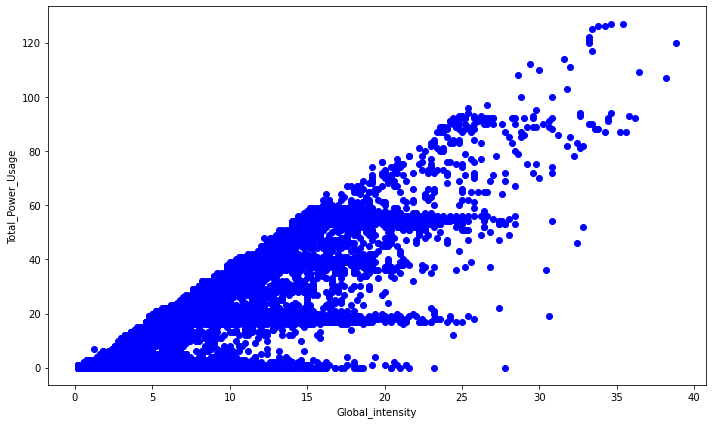

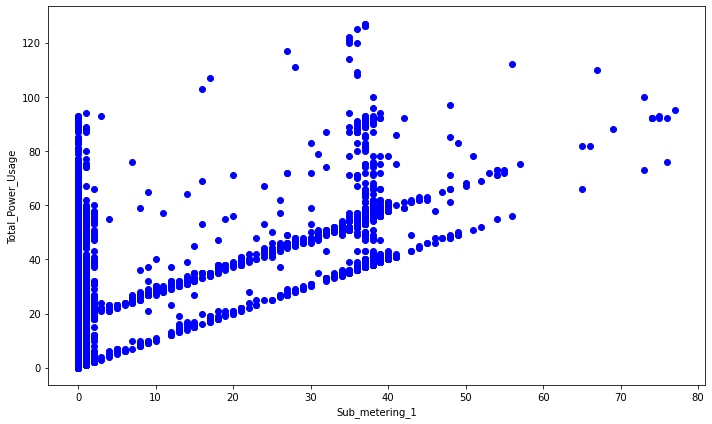

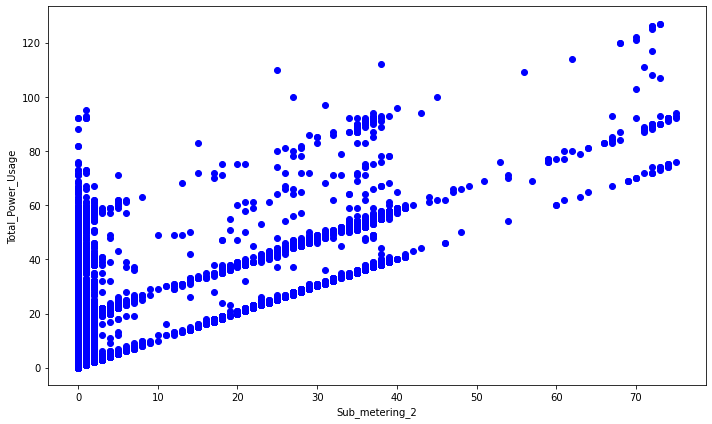

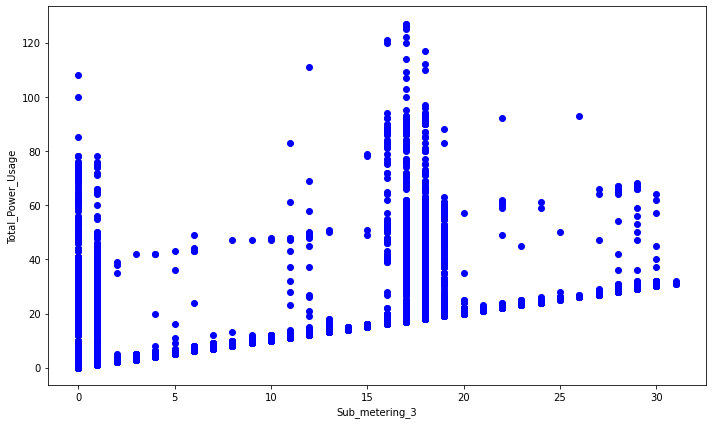

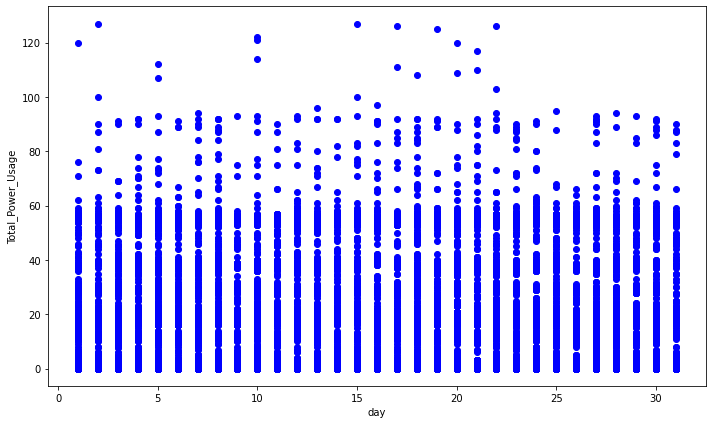

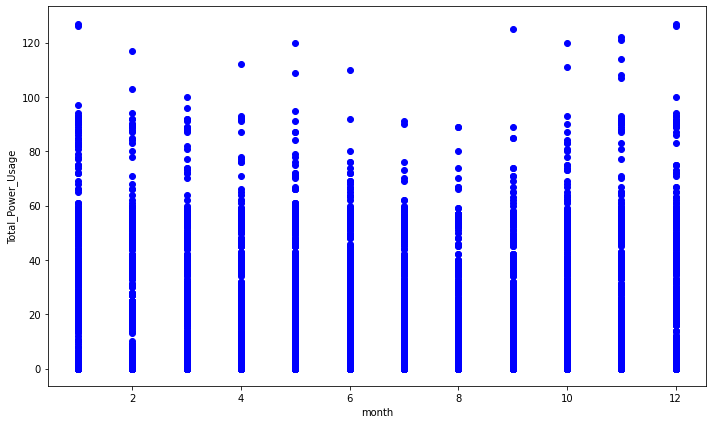

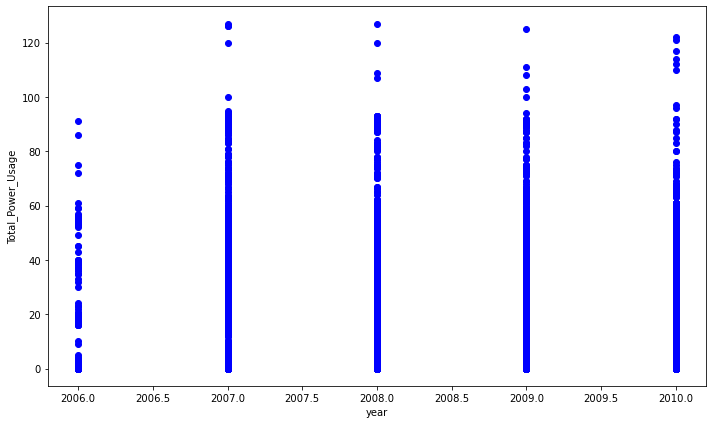

In [64]:
#### Comaparing the features against dependant feature 'Total_Power_Usage'
for features in data:
    plot_num=1
    if features!='Total_Power_Usage':
        plt.figure(figsize=(10,6))
        plt.scatter(x=data[features],y=data['Total_Power_Usage'],c='blue')
        plt.xlabel(features)
        plt.ylabel('Total_Power_Usage')
        plt.tight_layout()
        plot_num+=1

In [65]:
#### Checking correlation between the features
data.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,month,year,Total_Power_Usage
Global_active_power,1.000000,0.247642,-0.403876,0.998900,0.492156,0.438064,0.641381,0.006372,-0.031237,-0.036686,0.848660
Global_reactive_power,0.247642,1.000000,-0.114857,0.266809,0.134770,0.138916,0.085111,0.000947,0.023582,0.040599,0.182044
Voltage,-0.403876,-0.114857,1.000000,-0.415413,-0.196462,-0.170027,-0.277035,0.023519,-0.018293,0.256456,-0.350258
Global_intensity,0.998900,0.266809,-0.415413,1.000000,0.496834,0.444213,0.629476,0.005849,-0.029994,-0.041184,0.845913
Sub_metering_1,0.492156,0.134770,-0.196462,0.496834,1.000000,0.072243,0.106653,-0.002583,-0.006605,-0.014463,0.579077
Sub_metering_2,0.438064,0.138916,-0.170027,0.444213,0.072243,1.000000,0.086615,0.012116,-0.013256,-0.034463,0.539827
Sub_metering_3,0.641381,0.085111,-0.277035,0.629476,0.106653,0.086615,1.000000,-0.004743,-0.030476,0.060559,0.740049
day,0.006372,0.000947,0.023519,0.005849,-0.002583,0.012116,-0.004743,1.000000,0.015040,-0.041387,0.001124
month,-0.031237,0.023582,-0.018293,-0.029994,-0.006605,-0.013256,-0.030476,0.015040,1.000000,-0.085326,-0.028922
year,-0.036686,0.040599,0.256456,-0.041184,-0.014463,-0.034463,0.060559,-0.041387,-0.085326,1.000000,0.017001


#### Handling outliers

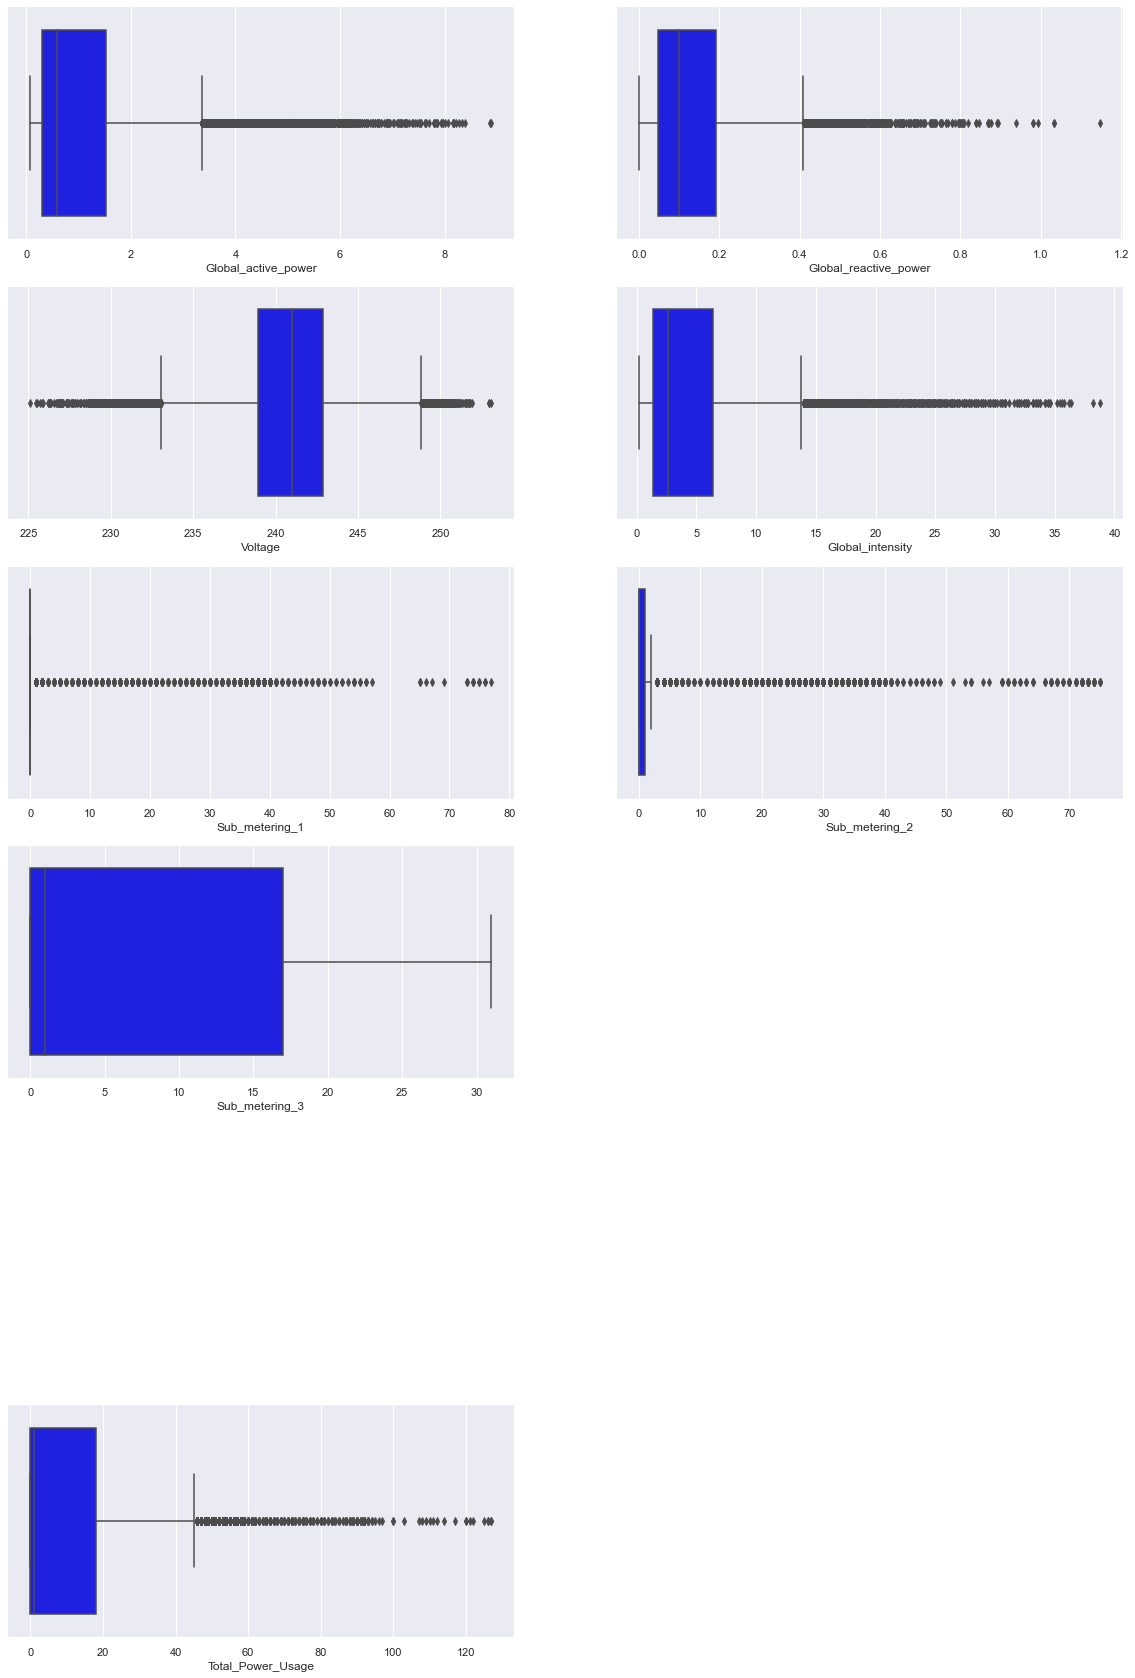

In [85]:
#### Visualising outliers using boxplot
plt.figure(figsize=(20,30))
for features in enumerate(data.columns):
        if features[1] not in ['day','month','year']:
            plt.subplot(6,2,features[0]+1)
            sns.set(rc={'figure.figsize':(10,8)})
            sns.boxplot(data=data,x=features[1],color='blue')
            plt.xlabel(features[1])

In [102]:
#### From the above plot it is very evident that the data contains a lot of out liers. We'll deal with that one by one.
def outlier_handle(feature):
    q1=data[feature].quantile(0.25)
    q3=data[feature].quantile(0.75)
    IQR=q3-q1
    lower_limit=q1-1.5*IQR
    upper_limit=q3+1.5*IQR
    index_to_drop=list(data[(data[feature]<lower_limit)|(data[feature]>upper_limit)].index)
    data.drop(index_to_drop,inplace=True)
    return 'Outliers Removed'

In [105]:
#### We are going to pass the features one by one to our function to remove outliers
for features in data.columns:
        if features not in ['day','month','year']:
            outlier_handle(features)  

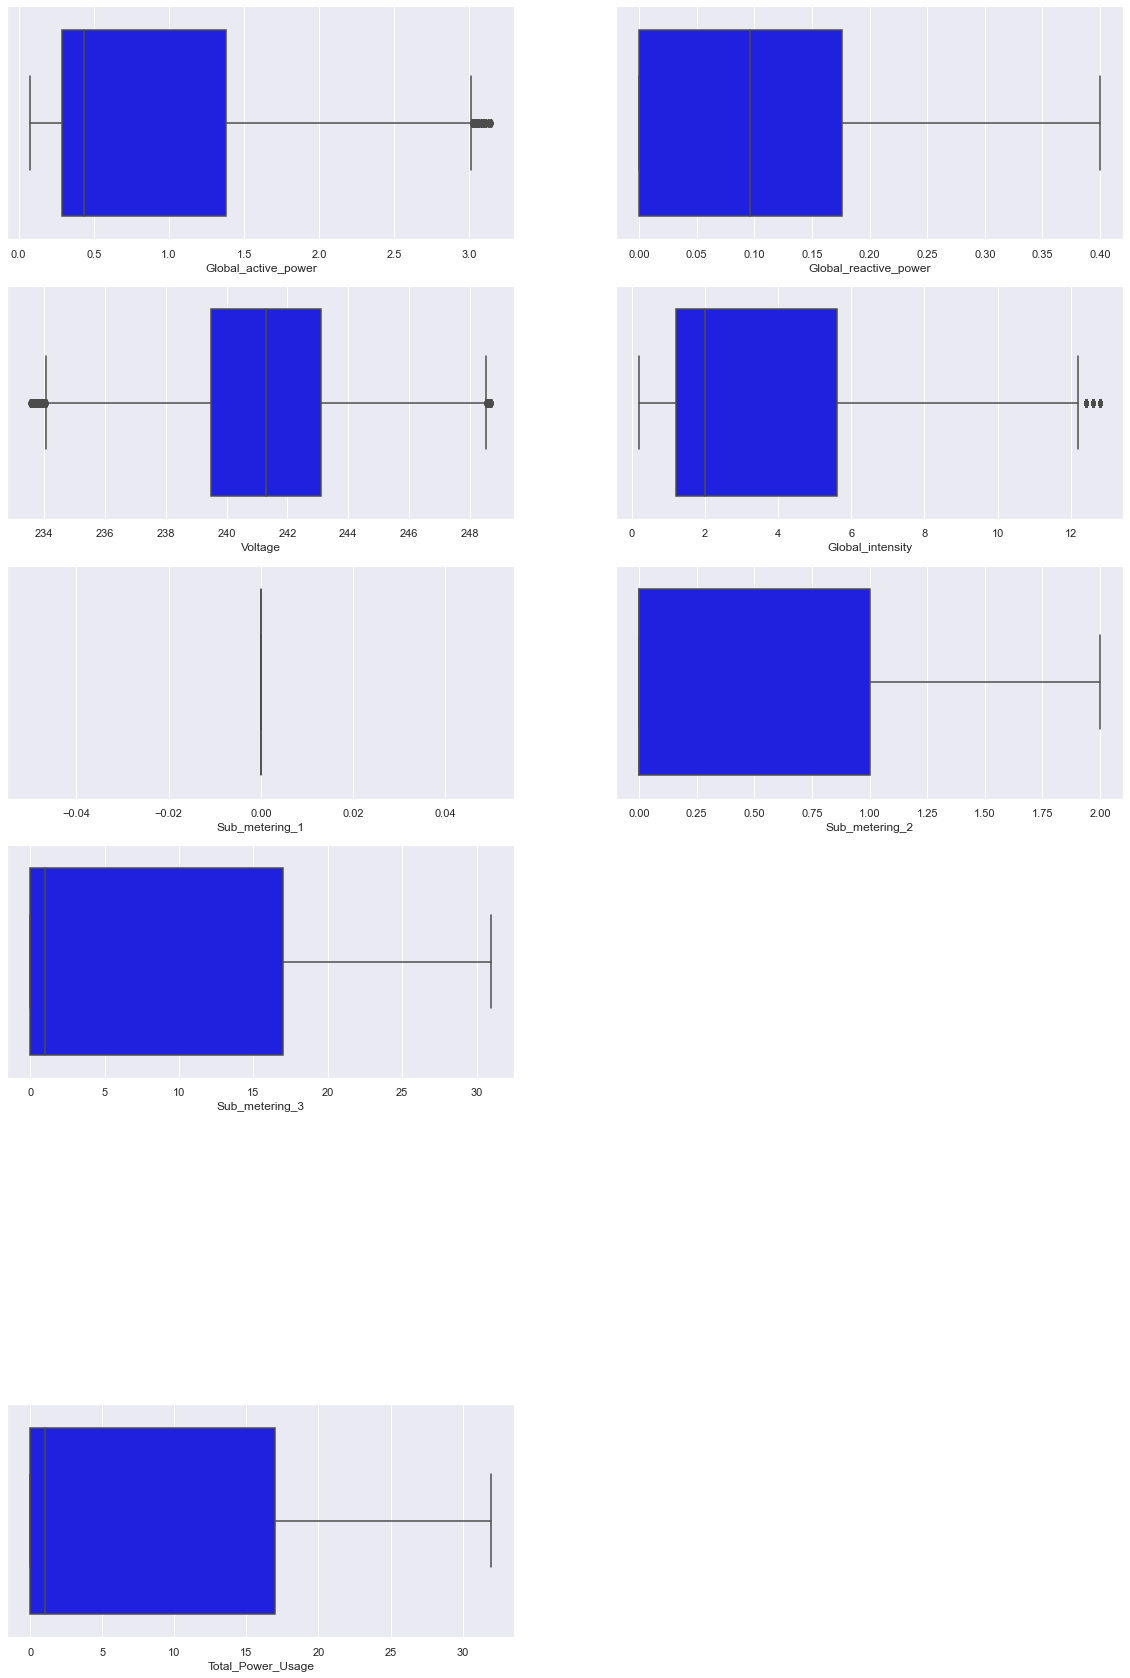

In [106]:
#### Checking the boxplot post outlier removal
plt.figure(figsize=(20,30))
for features in enumerate(data.columns):
        if features[1] not in ['day','month','year']:
            plt.subplot(6,2,features[0]+1)
            sns.set(rc={'figure.figsize':(10,8)})
            sns.boxplot(data=data,x=features[1],color='blue')
            plt.xlabel(features[1])

In [107]:
#### The plots look much better now. We can focus on model building now.

In [110]:
#### Removing duplicate data
data.duplicated().sum()

17

In [111]:
data.drop_duplicates(inplace=True)
data.reset_index(inplace=True)
data.duplicated().sum()

0

In [113]:
data.drop('index',axis=1,inplace=True)
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,month,year,Total_Power_Usage
0,0.272,0.000,244.34,1.2,0.0,0.0,1.0,8.0,12.0,2009.0,1.0
1,0.342,0.208,239.76,1.6,0.0,1.0,1.0,26.0,8.0,2010.0,2.0
2,1.440,0.106,243.86,5.8,0.0,0.0,19.0,17.0,12.0,2009.0,19.0
3,0.250,0.000,244.30,1.0,0.0,0.0,1.0,6.0,2.0,2010.0,1.0
4,0.288,0.156,243.65,1.4,0.0,2.0,0.0,12.0,1.0,2007.0,2.0


#### Model Building

In [114]:
#### Splitting Dependent and Independent columns
X=data.drop('Total_Power_Usage',axis=1)
y=data['Total_Power_Usage']
X.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,month,year
0,0.272,0.000,244.34,1.2,0.0,0.0,1.0,8.0,12.0,2009.0
1,0.342,0.208,239.76,1.6,0.0,1.0,1.0,26.0,8.0,2010.0
2,1.440,0.106,243.86,5.8,0.0,0.0,19.0,17.0,12.0,2009.0
3,0.250,0.000,244.30,1.0,0.0,0.0,1.0,6.0,2.0,2010.0
4,0.288,0.156,243.65,1.4,0.0,2.0,0.0,12.0,1.0,2007.0


In [115]:
y.head()

0     1.0
1     2.0
2    19.0
3     1.0
4     2.0
Name: Total_Power_Usage, dtype: float64

In [116]:
#### Splitting the training and test data
from sklearn.model_selection import train_test_split,GridSearchCV
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=10)

In [117]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()

In [118]:
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [120]:
model.score(X_train,y_train)

1.0

[Text(0.4774590163934426, 0.9166666666666666, 'X[6] <= 9.5\nsquared_error = 65.346\nsamples = 27697\nvalue = 5.818'),
 Text(0.21721311475409835, 0.75, 'X[5] <= 0.5\nsquared_error = 1.04\nsamples = 19702\nvalue = 0.764'),
 Text(0.09016393442622951, 0.5833333333333334, 'X[6] <= 3.5\nsquared_error = 0.557\nsamples = 14463\nvalue = 0.393'),
 Text(0.03278688524590164, 0.4166666666666667, 'X[6] <= 0.5\nsquared_error = 0.235\nsamples = 14354\nvalue = 0.345'),
 Text(0.01639344262295082, 0.25, 'squared_error = 0.0\nsamples = 9454\nvalue = 0.0'),
 Text(0.04918032786885246, 0.25, 'X[6] <= 1.5\nsquared_error = 0.016\nsamples = 4900\nvalue = 1.011'),
 Text(0.03278688524590164, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.06557377049180328, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.14754098360655737, 0.4166666666666667, 'X[6] <= 6.5\nsquared_error = 3.288\nsamples = 109\nvalue = 6.661'),
 Text(0.11475409836065574, 0.25, 'X[6] <= 5.5\nsquared_error = 0.774\nsamples = 57\nvalue = 5.123'),
 Text

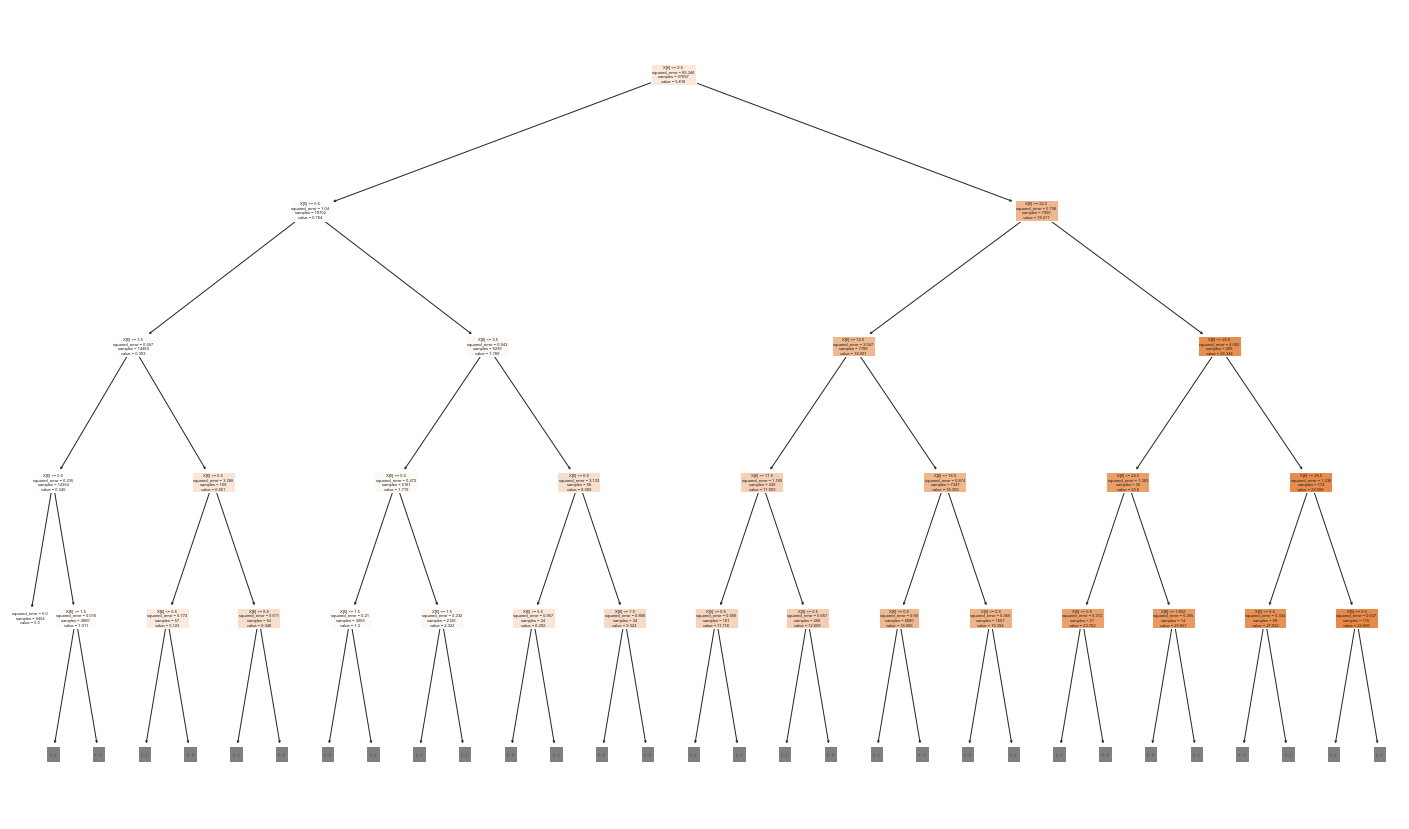

In [121]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model, max_depth=4,filled=True)

In [122]:
y_predict=model.predict(X_test)

In [123]:
from sklearn.metrics import r2_score

In [128]:
r2=r2_score(y_test,y_predict)
print('Our model has', round(r2*100,3),'% accuracy')

Our model has 99.998 % accuracy
